In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_down_ETH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,down,2017-03-18 09:00:00,BitcoinBuzzV9,0,0,#bitcoin #bitcoin #ethereum #eth #investing #b...,http://bitcoinbuzz.vega9.com - Hot topics: #bi...
1,ETH,down,2017-03-18 09:00:07,EthereumPrice_,0,0,#Ethereum,#Ethereum: Ether Price Index 1 ETH =0.037937Ƀ ...
2,ETH,down,2017-03-18 09:00:07,coinstats,0,0,#Ethereum #ETH,Ethereum - ETH Price: $41.1421 Change in 1h: +...
3,ETH,down,2017-03-18 09:00:08,AltAnalysisBot,0,0,NaN,Ethereum Classic-ETC|Strength Index 7.2%|BTC:0...
4,ETH,down,2017-03-18 09:00:32,coinstats,0,0,#Ethereum #ETC,Ethereum Classic - ETC Price: $1.76038 Change ...
...,...,...,...,...,...,...,...,...
467,ETH,down,2017-03-18 14:50:47,r_Ethereum,1,1,#Ethereum,ledger nano s and ethereum - HD wallet feature...
468,ETH,down,2017-03-18 14:51:25,lifeoncoin,0,0,NaN,"""(+) Ethereum Smashed Expectations"" http://ift..."
469,ETH,down,2017-03-18 14:52:30,atwilliams4,0,0,NaN,Ethereum Price Surge Is Due To One Singular Fa...
470,ETH,down,2017-03-18 14:56:22,Crypto_currenci,0,0,NaN,Ethereum smashed expectations https://hacked.c...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [hot, topics, :, bitcoin, ethereum, eth, inves...
1      [ethereum, :, ether, price, index, 1, eth, =0....
2      [ethereum, eth, price, :, $, 41.1421, change, ...
3      [ethereum, classic, etc|strength, index, 7.2, ...
4      [ethereum, classic, etc, price, :, $, 1.76038,...
                             ...                        
467    [ledger, nano, s, and, ethereum, hd, wallet, f...
468    [``, (, +, ), ethereum, smashed, expectations,...
469    [ethereum, price, surge, is, due, to, one, sin...
470    [ethereum, smashed, expectations, ?, p=16813, ...
471    [ethereum, losing, some, value, would, purchas...
Name: text, Length: 472, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [hot, topics, :, bitcoin, ethereum, investing,...
1      [ethereum, :, price, index, eth, =0.037937ƀ, x...
2      [ethereum, eth, price, :, $, change, :, %, mar...
3      [ethereum, classic, etc|strength, index, %, |b...
4      [ethereum, classic, etc, price, :, $, change, ...
                             ...                        
467    [ledger, ethereum, hd, wallet, features, ether...
468    [``, (, +, ), ethereum, smashed, expectations,...
469    [ethereum, price, surge, due, singular, factor...
470    [ethereum, smashed, expectations, ?, p=16813, ...
471    [ethereum, losing, value, purchase, $, ., heal...
Name: text, Length: 472, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

842

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

842


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

842

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

842

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

463.71968741189437

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.86962679601068

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.028203873192700478

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[0.011465674266219139, 0.011629646643996239, -...",ethereum,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.100530,0.834701,0.265829,NaN
1,"[0.0004432681598700583, 0.005853426642715931, ...",bitcoin,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.144790,0.332441,0.812349,NaN
6,"[0.008317211642861366, -0.0006096770521253347,...",price,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.216282,0.264802,0.951481,NaN
5,"[0.003753677476197481, 0.008814161643385887, -...",blockchain,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.154579,0.086348,1.068230,NaN
27,"[0.003657628782093525, 0.0036714316811412573, ...",surge,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.273637,0.159744,1.113892,NaN
130,"[0.002937564393505454, 0.006834343541413546, -...",dash,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.230131,0.035978,1.194152,NaN
404,"[0.0011741737835109234, 0.006778859533369541, ...",singular,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.331318,0.126644,1.204673,NaN
105,"[-0.0003772436757571995, 0.002152683911845088,...",question,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.231711,0.011513,1.220198,NaN
115,"[0.001862107776105404, 0.0066946716979146, -0....",alert,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.279200,0.015831,1.263369,NaN
117,"[0.0017499950481578708, 0.002677901880815625, ...",coin,0,"[0.00063981785, 0.0012698575, 0.00053739565, 3...",0.287313,0.017270,1.270043,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10,"[0.0026376573368906975, 0.0023832533042877913,...",change,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.225752,0.044613,1.181139,NaN
30,"[0.004188183695077896, 0.005096397362649441, -...",investor,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.253129,0.023026,1.230103,NaN
133,"[-0.0011652427492663264, 0.002194841392338276,...",movie,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.303244,0.018709,1.284536,NaN
443,"[-0.0010255121160298586, -0.001620499067939818...",project,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.302318,0.010074,1.292245,NaN
405,"[0.003964713308960199, -0.0016232255147770047,...",factor,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.421473,0.126644,1.294829,NaN
67,"[0.0019335029646754265, 0.0026093621272593737,...",crowdfund,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.309953,0.014391,1.295562,NaN
135,"[0.0010173036716878414, -0.0018742104293778539...",merkle,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.313500,0.014391,1.299108,NaN
76,"[0.0041118948720395565, 0.00639572786167264, -...",exchange,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.326390,0.011513,1.314877,NaN
179,"[0.007378488313406706, 0.0028043596539646387, ...",fork,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.348798,0.015831,1.332968,NaN
346,"[0.004101085476577282, -0.00015428171900566667...",base,1,"[0.0013526116, 0.00031487146, -0.00100951, 0.0...",0.349812,0.011513,1.338299,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
827,"[0.004551719408482313, -0.0033419905230402946,...",контракты,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.452782,0.001439,1.451343,NaN
49,"[0.0031667586881667376, 0.003885803045704961, ...",tear,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.511737,0.028783,1.482954,NaN
522,"[-0.0011082898126915097, 0.005285095423460007,...",consider,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.565499,0.001439,1.564060,NaN
460,"[-0.002389779081568122, 0.003287702798843384, ...",beginner,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.594850,0.002878,1.591971,NaN
35,"[-0.0005692200502380729, 0.003125723684206605,...",take,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.598814,0.005757,1.593057,NaN
401,"[0.0004425811057444662, -0.0016192375915125012...",hack,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.613628,0.005757,1.607871,NaN
724,"[1.936581429617945e-05, 0.00289721367880702, -...",scale,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.626805,0.001439,1.625366,NaN
241,"[-0.001672048238106072, -0.0013750793877989054...",lend,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.635195,0.002878,1.632316,NaN
414,"[0.0046326881274580956, -0.001976233208552003,...",campether,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.640370,0.004317,1.636053,NaN
330,"[0.0009287050343118608, 0.0009284138795919716,...",kryptomoney,2,"[0.00061389507, 0.00028497042, -0.00056354277,...",0.640076,0.002878,1.637198,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
745,"[0.0027525757905095816, 0.0051185195334255695,...",vdice_io,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.508589,0.001439,1.507150,NaN
337,"[8.058785169851035e-05, 0.0029858346097171307,...",goethereum,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.574123,0.004317,1.569806,NaN
408,"[0.0058091143146157265, -0.0027179790195077658...",private,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.596886,0.004317,1.592568,NaN
775,"[0.001526920939795673, 0.000576282269321382, -...",даркнет,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.605650,0.002878,1.602771,NaN
284,"[0.003790362272411585, 0.0037030980456620455, ...",prepare,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.634467,0.002878,1.631589,NaN
630,"[-0.0011922501726076007, 0.0012892273953184485...",foundation,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.636722,0.001439,1.635283,NaN
272,"[0.003567761043086648, -0.000929827569052577, ...",drop,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.652686,0.002878,1.649807,NaN
789,"[0.000716598064173013, -0.00026315078139305115...",coincapmarket,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.656206,0.001439,1.654767,NaN
141,"[0.0013116453774273396, 0.0036791800521314144,...",team,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.659271,0.002878,1.656392,NaN
402,"[-0.004623187240213156, 0.003787025809288025, ...",ethereumprice,3,"[-0.00015879214, 0.00047270604, -0.00058248726...",0.663227,0.002878,1.660349,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

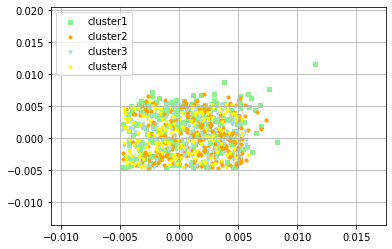

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

273

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

240

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

162

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

167

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 5 # 이슈

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

0.7045342922210693

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 2 2 2 3 2 2 3 3 2 2 2 3 2 0 1 0 0 0 0 0 3 1 3 1 0 1 2 3 3 2 2 1 3 3 3 1
 1 3 2 3 2 3 2 1 0 3 3 1 3 3 3 1 0 0 3 3 1 0 0 3 3 3 3 3 3 2 2 2 3 0 1 0 0
 3 1 2 3 0 1 1 3 3 2 3 3 3 3 3 2 3 3 0 2 0 1 0 1 0 1 3 0 0 0 1 2 1 1 1 3 0
 3 1 3 0 2 2 2 2 1 1 3 2 1 1 3 1 0 0 3 2 3 2 2 2 2 3 0 0 0 0 3 0 0 0 0 2 1
 0 3 2 3 3 1 2 3 0 1 3 0 1 1 1 1 3 0 1 1 3 3 3 1 1 3 3 0 2 3 2 2 1 2 1 3 2
 1 1 1 0 1 1 3 1 1 0 1 3 0 3 2 3 1 3 2 1 1 0 2 2 2 0 3 0 0 3 0 3 2 3 3 2 3
 3 3 2 1 0 0 0 1 1 0 1 1 1 1 1 0 3 3 0 3 3 0 0 0 0 0 3 3 1 3 3 1 3 3 3 0 0
 1 1 1 3 1 2 3 3 3 3 0 0 2 3 1 1 0 0 1 1 3 1 1 1 1 1 0 1 0 1 3 0 0 0 1 0 1
 0 3 3 0 3 0 1 3 1 1 0 3 1 0 3 1 1 1 1 2 1 1 3 1 1 0 1 3 0 1 1 1 0 0 3 1 3
 0 3 3 3 3 1 1 3 3 0 3 2 3 2 2 3 1 1 1 1 3 2 1 1 0 2 3 1 1 3 3 3 3 3 0 0 1
 1 2 2 0 1 1 3 0 1 1 0 0 0 0 1 1 3 3 0 1 1 0 3 0 0 1 1 1 1 0 3 3 1 0 2 2 1
 1 3 3 1 1 1 0 1 3 1 0 1 0 0 1 1 3 3 3 1 2 3 3 1 1 3 1 1 1 1 0 1 1 3 1 1 2
 1 3 0 1 1 1 1 3 3 0 3 1 1 0 1 1 3 1 1 2 1 1 2 0 3 1 0 0 1 0 3 3

In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.7045342922210693


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.013895005


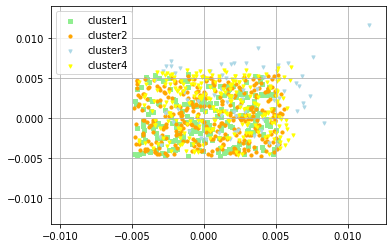

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
206,"[0.00018190970877185464, -0.000490161706693470...",crypto,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.029138,0.012952,1.016186,NaN
156,"[0.004578958731144667, -0.0009656344191171229,...",subscriber,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.030021,0.010074,1.019947,NaN
399,"[0.0036529265344142914, 0.00015204148076009005...",read,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.027190,0.005757,1.021433,NaN
215,"[-0.0008853531326167285, -0.000124071899335831...",neonetwalker,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.026413,0.004317,1.022096,NaN
213,"[-0.0033430373296141624, -0.001848699059337377...",surpass,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.026941,0.004317,1.022623,NaN
142,"[-0.0010900917695835233, 0.003840737510472536,...",ethtrade,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.028505,0.005757,1.022748,NaN
420,"[0.0009829620830714703, -0.004258506465703249,...",bitcoin_mining,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.028532,0.005757,1.022775,NaN
661,"[8.08598178991815e-06, 0.0024017428513616323, ...",security,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.027431,0.004317,1.023114,NaN
565,"[0.0035362106282263994, 0.005257091950625181, ...",russia,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.024855,0.001439,1.023416,NaN
227,"[-0.0011412465246394277, 0.004595533013343811,...",social,0,"[0.00020477237, -0.00015598512, 0.00085982063,...",0.028125,0.004317,1.023808,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
384,"[-0.002133171772584319, 0.0005195896374061704,...",twitter,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.028646,0.012952,1.015694,NaN
48,"[0.0012959542218595743, -0.0025132771115750074...",cryptocoinsnews,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.028487,0.005757,1.022730,NaN
406,"[0.004927763715386391, -0.000345287611708045, ...",next,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.025733,0.002878,1.022855,NaN
632,"[-0.0006584385992027819, 0.004887053277343512,...",ignorance,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.024500,0.001439,1.023061,NaN
250,"[0.001251550274901092, 0.0008876454085111618, ...",mayor,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.028887,0.005757,1.023131,NaN
780,"[-0.003919526003301144, -0.0005440517561510205...",daily,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.024845,0.001439,1.023405,NaN
498,"[-0.000498756708111614, 0.003890169318765402, ...",headline,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.026325,0.002878,1.023447,NaN
430,"[0.0014396469341591, -0.0008486293372698128, 0...",blockgks,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.027786,0.004317,1.023469,NaN
438,"[-0.00045720013440586627, 0.002368420362472534...",ether,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.026376,0.002878,1.023498,NaN
648,"[-0.0004938982310704887, -0.003844643943011760...",singul,1,"[0.00042260604, 0.0002331741, -0.0005875485, 2...",0.024965,0.001439,1.023526,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[0.011465674266219139, 0.011629646643996239, -...",ethereum,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.075379,0.834701,0.240679,NaN
1,"[0.0004432681598700583, 0.005853426642715931, ...",bitcoin,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.038475,0.332441,0.706033,NaN
6,"[0.008317211642861366, -0.0006096770521253347,...",price,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.034771,0.264802,0.769969,NaN
27,"[0.003657628782093525, 0.0036714316811412573, ...",surge,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.030341,0.159744,0.870597,NaN
404,"[0.0011741737835109234, 0.006778859533369541, ...",singular,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.030198,0.126644,0.903554,NaN
405,"[0.003964713308960199, -0.0016232255147770047,...",factor,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.031021,0.126644,0.904376,NaN
208,"[0.0020660576410591602, 0.0068725477904081345,...",style,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.030305,0.082031,0.948274,NaN
5,"[0.003753677476197481, 0.008814161643385887, -...",blockchain,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.034705,0.086348,0.948356,NaN
209,"[0.005851403344422579, 0.006828622426837683, -...",split,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.030389,0.082031,0.948358,NaN
207,"[-0.002970053581520915, -0.003354434622451663,...",face,2,"[0.0021511114, 0.0024911773, -0.00048198958, 0...",0.031343,0.080592,0.950751,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
38,"[0.004999607335776091, -0.0018707041162997484,...",news,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.029795,0.040296,0.989499,NaN
50,"[0.002470977371558547, 0.002187052508816123, 0...",reach,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.028593,0.033100,0.995493,NaN
49,"[0.0031667586881667376, 0.003885803045704961, ...",tear,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.028740,0.028783,0.999958,NaN
12,"[0.001062322175130248, 0.00526892626658082, -0...",rank,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.025748,0.017270,1.008478,NaN
51,"[0.005186117719858885, 7.106581324478611e-05, ...",buybitcoin,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.030035,0.020148,1.009887,NaN
91,"[0.004618233069777489, 0.004027905873954296, -...",cointelegraph,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.030239,0.017270,1.012969,NaN
81,"[-0.002640101592987776, 0.004802900366485119, ...",litecoin,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.029109,0.014391,1.014718,NaN
497,"[0.00030675818561576307, -0.001367104938253760...",increase,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.029591,0.014391,1.015200,NaN
496,"[0.0019488093676045537, 0.004243229515850544, ...",reflection,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.029843,0.014391,1.015452,NaN
129,"[0.0006466833874583244, -0.00140068877954036, ...",nowplaying,3,"[0.0010390789, 0.0014264197, -0.0010876602, -3...",0.026044,0.008635,1.017409,NaN


In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 이슈

222

In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 인플

315

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 거래소

69

In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 이슈

236

In [97]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 6 # 인플

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈

In [102]:
temp_cluster_result1['Silhouette'] = 0.013895005
temp_cluster_result['Silhouette'] = 0.013895005
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [103]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_ETC0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_ETC0_cosine")